# Lotkar Volterra Discrete Model

Lets consider the ecological interaction between two species: ***prey-predator*** interaction. Lets stay in the population level description of the species described by variables $x$ and $y$.

Points to consider:
- Any of these interactions can be also represented in the form of ***causal loop diagram***
- **Inherent dynamics**: how does the dynamic rolls without the interaciton from other variables. Eg: prey grow if there are no predators and predators die if there are no prey.
- **Interaction between variables**: How one variable affects another? Eg: prey death rate increases as predator population increases and predator growth rate increases as the prey population increases.


**Mathematical translation** of interaction:
- For inherent dynamic we can assume two of the growth models: ***Logistic growth*** for prey ($x$) and ***Exponential decay*** for predator. ie.

$$
x_{t}  = x_{t-1} + r_{x} x_{t-1} (1 - \frac{x_{t-1}}{K})
$$

$$
y_{t} = y_{t-1} - d_{y} y_{t-1}
$$

where $r_{x}$ is growth rate of prey and $d_{y}$ is the death rate of predator.

- For interaction dynamic, one has to change above equation wisely. IN our case, the interaction changes the growth rate of prey and death rate of predator as:

$$
x_{t}  = x_{t-1} + r_{x} x_{t-1} (1 - \frac{x_{t-1}}{K}) - d_{x}(y_{t-1}) x_{t-1}
$$

$$
y_{t} = y_{t-1} - d_{y} y_{t-1} + r_{y}(x_{t-1})y_{t-1} 
$$

Here, we need to find a way to express $d_{x}$ and $r_{y}$ in some mathematical form by appropiately analyzing assumptions of the model. 
For eg:  the death rate of prey is 0 where there are no predator and it should approch high (1) where there are too many predators. One of such mathematical form is ***hyperbolic function***. i.e

$$
d_{x} (y) = 1 - \frac{1}{by + 1}
$$

where b determines how quickly $d_{x}$ increases as $y$ increases.

Similarly, the growth rate of predator should be 0 if there ar no prey and should increase indefinitely if prey population increases. we can use exponential function i.e

$$
r_{y}(x) = c x
$$

where $c$ defines the rate of increase.

Lets plug in the values and solve these dynamical equations.

Ref: https://milneopentextbooks.org/introduction-to-the-modeling-and-analysis-of-complex-systems/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])

In [88]:
# initialize
def initialize():
    global x, y, xresult, yresult, t, timesteps 
    x = 10 # 
    xresult = [x] 
    y = 5
    yresult = [y]
    t = 1
    timesteps = [t]

# update rule
def update():
    global x, y, xresult, yresult, t, timesteps 
    nextx = x + r*x*(1-x/K) - (1-1/(b*y +1))*x
    nexty = y - d*y + c*x*y
    x,y = nextx,nexty
    t = t + 1 

#observe
def observe():
    global x, y, xresult, yresult, t, timesteps 
    xresult.append(x)
    yresult.append(y)
    timesteps.append(t)
    



In [114]:
r = 1 # rate of increase of prey (logistic)
b = 0.5 # decrease in prey due to interaction
d = 1 # rate of decrease of predator (exp)
c = 1 #increase in predator due to interaction
K = 9 # population limit for prey

initialize()
while t < 1000.:
    update()
    observe()

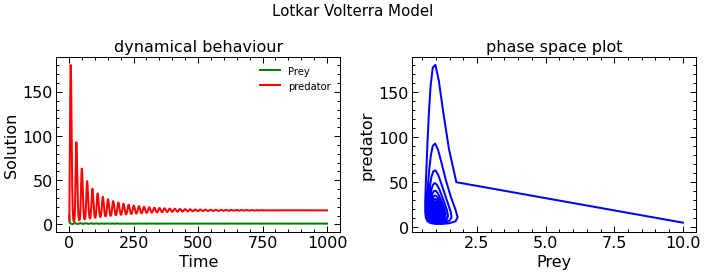

In [115]:
#plotting

fig, axes = plt.subplots(1, 2, figsize=(10,3.5))

ax = axes[0]
ax.plot(timesteps,xresult,'g-')
ax.plot(timesteps,yresult, 'r-')
ax.set_xlabel("Time")
ax.set_ylabel('Solution')
ax.set_title('dynamical behaviour')
ax.legend(['Prey', 'predator'], fontsize=10)


ax = axes[1]
ax.plot(xresult,yresult, 'b')
ax.set_xlabel('Prey')
ax.set_ylabel('predator')
ax.set_title('phase space plot')
#ax.legend()

fig.tight_layout()
fig.suptitle('Lotkar Volterra Model', y=1.1, fontsize=15)
plt.show()